# This notebook illustrates how to create a more useful boxplot

Boxplots are great ways to illustrate comparisons of distributions between groups. Several key drawbacks of default created boxplots include: 1) Failing to take into account how many observations fall into each box; 2) Not including indications of the mean which can be affected by outliers; and 3) Providing the value of the mean on the chart. The approach below was modified from several different sources to create a boxplot that addresses these issues using Matplotlib. Note, to run this you will need to extract the file "clu_calc.csv" from the GitHub page and set your path for the file to download (or wherever you place the file). Happy plotting.

In [1]:
# load packages
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import os

In [2]:
# change working directory to your downloads folder
os.chdir('/Users/hooverjh/Downloads') #replace the path to wherever you place the downloaded file
os.getcwd()

'/Users/hooverjh/Downloads'

In [4]:
# download the file clu_calc.csv from GitHub into your Downloads folder
df = pd.read_csv("clu_calc.csv")
df

,CustID,Gender,Age,Inc,SpendScr,label
0,1,Male,19,15,39,1
1,2,Male,21,15,81,1
2,3,Female,20,16,6,1
3,4,Female,23,16,77,1
4,5,Female,31,17,40,1
...,...,...,...,...,...,...
195,196,Female,35,120,79,2
196,197,Female,45,126,28,0
197,198,Male,32,126,74,2
198,199,Male,32,137,18,0


In [5]:
# change the cluster label from an integer to a string (i.e., category)
df.label = df.label.astype(str)

In [6]:
# check the data type of the columns
df.dtypes

CustID       int64
Gender      object
Age          int64
Inc          int64
SpendScr     int64
label       object
dtype: object

In [7]:
# sort the rows by the label
df = df.sort_values(by = 'label')
df

,CustID,Gender,Age,Inc,SpendScr,label
136,137,Female,44,73,7,0
154,155,Female,47,78,16,0
152,153,Female,44,78,20,0
198,199,Male,32,137,18,0
148,149,Female,34,78,22,0
...,...,...,...,...,...,...
46,47,Female,50,40,55,3
18,19,Male,52,23,29,3
98,99,Male,48,61,42,3
92,93,Male,48,60,49,3


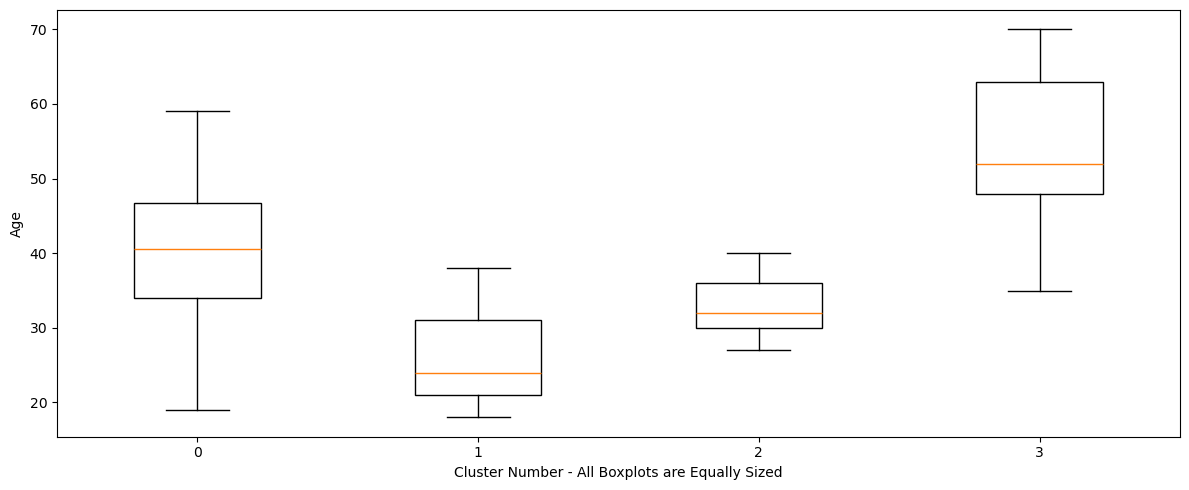

In [8]:
# adapted from https://stackoverflow.com/questions/63792528/boxplot-custom-width-in-seaborn
# illustrate boxplots where all are equally sized
fig, ax1 = plt.subplots(ncols=1, figsize=(12, 5))
bins, groups = zip(*df.groupby('label')['Age'])
lengths = np.array([len(group) for group in groups])
max_width = 0.8
ax1.boxplot(groups,
            patch_artist=True, boxprops={'facecolor': 'white'})
ax1.set_xticklabels(bins)
ax1.set_xlabel('Cluster Number - All Boxplots are Equally Sized')
ax1.set_ylabel('Age')
plt.tight_layout()
plt.show()

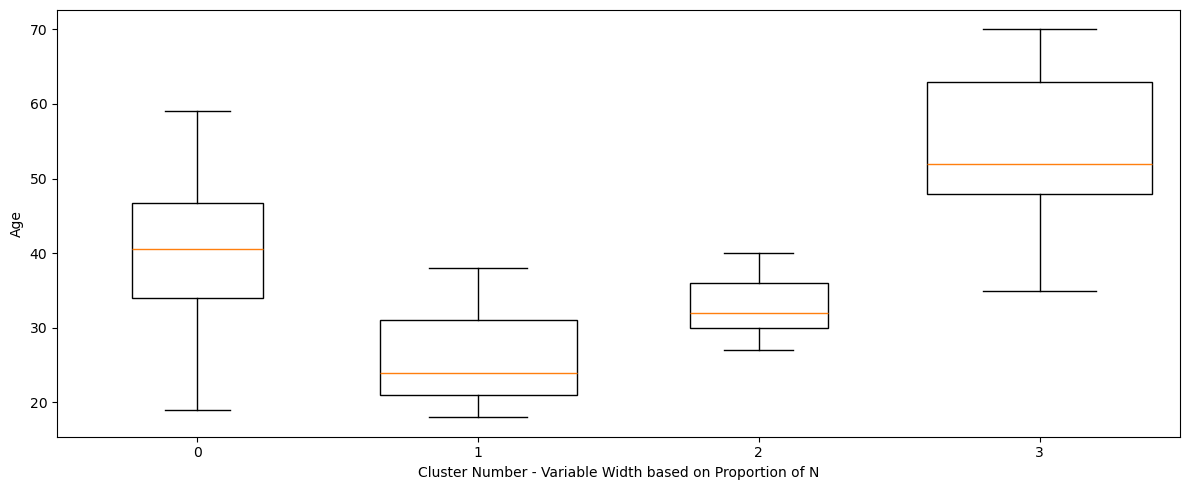

In [9]:
# adapted from https://stackoverflow.com/questions/63792528/boxplot-custom-width-in-seaborn
fig, ax1 = plt.subplots(ncols=1, figsize=(12, 5))
bins, groups = zip(*df.groupby('label')['Age'])
lengths = np.array([len(group) for group in groups])
max_width = 0.8
ax1.boxplot(groups, widths=max_width * lengths / lengths.max(),
            patch_artist=True, boxprops={'facecolor': 'white'})
ax1.set_xticklabels(bins)
ax1.set_xlabel('Cluster Number - Variable Width based on Proportion of N')
ax1.set_ylabel('Age')
plt.tight_layout()
plt.show()

In [10]:
# calculate the variable widths for the boxplot
df2 = df.groupby(['label']).size()
largest = df2.max()
maxwidth = 0.8
df2 = df2.to_frame(name='count')
df2 = df2.reset_index()
df2['width'] = maxwidth * df2['count'] / largest
width = df2['width']
width

0    0.467692
1    0.701538
2    0.492308
3    0.800000
Name: width, dtype: float64

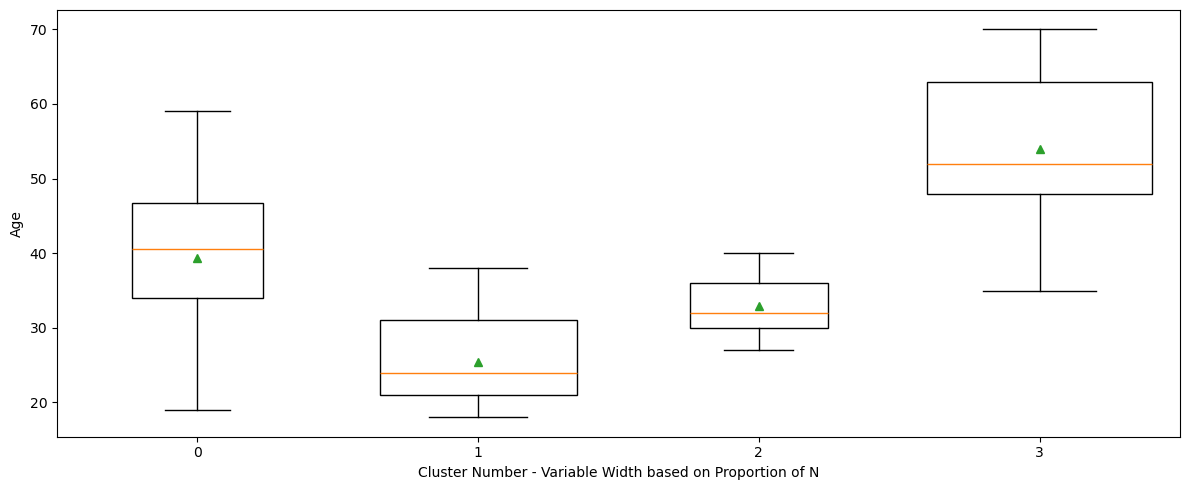

In [11]:
# add the means labels to the boxplots
# https://stackoverflow.com/questions/58066009/how-to-display-numeric-mean-and-std-values-next-to-a-box-plot-in-a-series-of-box

fig, ax1 = plt.subplots(ncols=1, figsize=(12, 5))
bins, groups = zip(*df.groupby('label')['Age'])
lengths = np.array([len(group) for group in groups])
max_width = 0.8
ax1.boxplot(groups, widths=max_width * lengths / lengths.max(),
            showmeans=True,
            patch_artist=True, boxprops={'facecolor': 'white'})
ax1.set_xticklabels(bins)
ax1.set_xlabel('Cluster Number - Variable Width based on Proportion of N')
ax1.set_ylabel('Age')
plt.tight_layout()
plt.show()

In [12]:
# illustrate how to get the means
bp = ax1.boxplot(groups, widths=max_width * lengths / lengths.max(),
            showmeans=True,
            patch_artist=True, boxprops={'facecolor': 'white'})
means = [mean.get_ydata() for mean in bp["means"]]
means = pd.DataFrame(means)
means.columns = ['means']
means.means = round(means.means,1)
means

,means
0,39.4
1,25.4
2,32.9
3,54.0


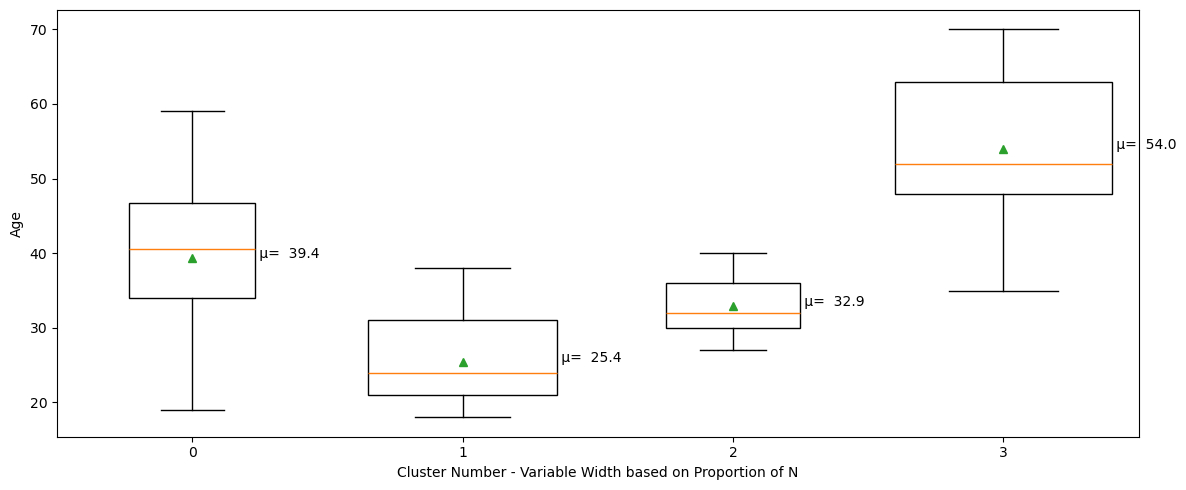

In [13]:
# add the means labels to the boxplots
# https://stackoverflow.com/questions/58066009/how-to-display-numeric-mean-and-std-values-next-to-a-box-plot-in-a-series-of-box

fig, ax1 = plt.subplots(ncols=1, figsize=(12, 5))
bins, groups = zip(*df.groupby('label')['Age'])
lengths = np.array([len(group) for group in groups])
max_width = 0.8
ax1.boxplot(groups, widths=max_width * lengths / lengths.max(),
            showmeans=True,
            patch_artist=True, boxprops={'facecolor': 'white'})
means = [mean.get_ydata() for mean in bp["means"]]
means = pd.DataFrame(means)
means.columns = ['means']
means.means = round(means.means,1)
for i, line in enumerate(bp['medians']):
    x, y = line.get_xydata()[1]
    x=x
    y=means.means[i]
    text = ' μ=  ' + str(means.means[i])
    ax1.annotate(text, xy=(x, y))

ax1.set_xticklabels(bins)
ax1.set_xlabel('Cluster Number - Variable Width based on Proportion of N')
ax1.set_ylabel('Age')
plt.tight_layout()
plt.show()

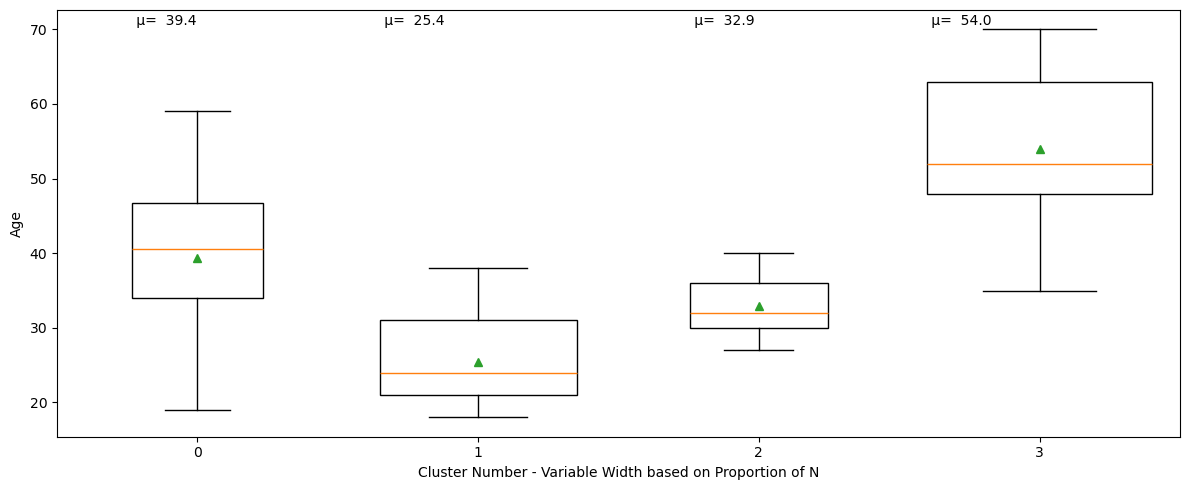

In [16]:
# add the means labels to the boxplots
# https://stackoverflow.com/questions/58066009/how-to-display-numeric-mean-and-std-values-next-to-a-box-plot-in-a-series-of-box

fig, ax1 = plt.subplots(ncols=1, figsize=(12, 5))
bins, groups = zip(*df.groupby('label')['Age'])
lengths = np.array([len(group) for group in groups])
max_width = 0.8
ax1.boxplot(groups, widths=max_width * lengths / lengths.max(),
            showmeans=True,
            patch_artist=True, boxprops={'facecolor': 'white'})
means = [mean.get_ydata() for mean in bp["means"]]
means = pd.DataFrame(means)
means.columns = ['means']
means.means = round(means.means,1)
yvalue = ax1.get_ylim()[1]
for i, line in enumerate(bp['medians']):
    x, y = line.get_xydata()[0]
    x=x
    y=means.means[i]
    text = ' μ=  ' + str(means.means[i])
    ax1.annotate(text, xy=(x, yvalue-2))

ax1.set_xticklabels(bins)
ax1.set_xlabel('Cluster Number - Variable Width based on Proportion of N')
ax1.set_ylabel('Age')
plt.tight_layout()
plt.show()